In [31]:
import cv2
import math
import numpy as np
import matplotlib.pylab as plt
from glob import glob

In [37]:
images_list = glob(r"KI/Bilder2/*.png")
#image = cv2.imread(images_list[30])
image = cv2.imread(r".\KI\Bilder2\PXL_20230414_105843090.jpg")
image = cv2.resize(image, (600,800))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

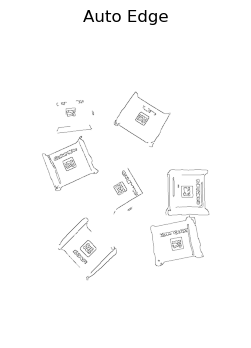

In [38]:
def auto_canny_edge_detection(image, sigma=0.33):
    md = np.median(image)
    lower_value = int(max(0, (1.0-sigma) * md))
    upper_value = int(min(255, (1.0+sigma) * md))
    return cv2.Canny(image, lower_value, upper_value)

auto_edge = auto_canny_edge_detection(blurred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(auto_edge, cmap='Greys')
ax.axis('off')
ax.set_title('Auto Edge')
plt.show()

In [39]:
# Copy edges to the images that will display the results in BGR
dst = cv2.Canny(blurred, 50, 200, None, 3)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)



In [40]:
# Probabilistic Line Transform
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 20, 3, 2, 10)
# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
        


In [41]:
hori = np.concatenate((image, cdst), axis=1)

winname="Katenerkennung"
cv2.namedWindow(winname) 
cv2.moveWindow(winname, 40,30)
cv2.imshow(winname, hori)

cv2.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
cv2.waitKey()
cv2.destroyAllWindows()